# GPT-4 Turbo with Vision demo - Azure Open AI - Fashion usecase

GPT-4 Turbo with Vision on Azure OpenAI service is now in public preview. GPT-4 Turbo with Vision is a large multimodal model (LMM) developed by OpenAI that can analyze images and provide textual responses to questions about them. It incorporates both natural language processing and visual understanding. With enhanced mode, you can use the Azure AI Vision features to generate additional insights from the images.

> https://learn.microsoft.com/en-us/azure/ai-services/openai/whats-new#gpt-4-turbo-with-vision-now-available

In [1]:
# %pip install openai --upgrade

In [2]:
import base64
import datetime
import gradio as gr
import json
import openai
import os
import requests
import sys

from dotenv import load_dotenv
from io import BytesIO
from PIL import Image

In [3]:
def check_openai_version():
    """
    Check Azure Open AI version
    """
    installed_version = openai.__version__

    try:
        version_number = float(installed_version[:3])
    except ValueError:
        print("Invalid OpenAI version format")
        return

    print(f"Installed OpenAI version: {installed_version}")

    if version_number < 1.0:
        print("[Warning] You should upgrade OpenAI to have version >= 1.0.0")
        print("To upgrade, run: %pip install openai --upgrade")
    else:
        print(f"[OK] OpenAI version {installed_version} is >= 1.0.0")

In [4]:
check_openai_version()

Installed OpenAI version: 1.3.8
[OK] OpenAI version 1.3.8 is >= 1.0.0


In [5]:
sys.version

'3.10.10 (main, Mar 21 2023, 18:45:11) [GCC 11.2.0]'

In [6]:
print(f"Today is {datetime.datetime.today().strftime('%d-%b-%Y %H:%M:%S')}")

Today is 14-Dec-2023 10:14:54


In [7]:
print(f"Python version: {sys.version}")

Python version: 3.10.10 (main, Mar 21 2023, 18:45:11) [GCC 11.2.0]


## 1. Azure Open AI

In [8]:
print(f"OpenAI version: {openai.__version__}")

OpenAI version: 1.3.8


In [9]:
load_dotenv("azure.env")

# Azure Open AI
openai.api_type: str = "azure"
openai.api_key = os.getenv("OPENAI_API_KEY")
openai.api_base = os.getenv("OPENAI_API_BASE")

In [10]:
model = "GPT4Vision"  # This is the deployed name of your GPT4 Vision model from the Azure Open AI studio

## 2. Functions

In [11]:
def image_view(image_file):
    """
    View image
    """
    if not os.path.exists(image_file):
        print(f"[Error] Image file {image_file} does not exist.")
        return None

    else:
        print(image_file)
        img = Image.open(image_file)
        display(img)

In [12]:
def gpt4V_fashion(image_file):
    """
    GPT4-Vision
    """
    # Checking if file exists
    if not os.path.exists(image_file):
        print(f"[Error] Image file {image_file} does not exist.")
        return None

    # Endpoint
    base_url = f"{openai.api_base}/openai/deployments/{model}"
    gpt4vision_endpoint = f"{base_url}/chat/completions?api-version=2023-12-01-preview"

    # Header
    headers = {"Content-Type": "application/json", "api-key": openai.api_key}

    # Encoded image
    base_64_encoded_image = base64.b64encode(open(image_file, "rb").read()).decode(
        "ascii"
    )

    context = """ 
    You are a fashion expert, familiar with identifying features of fashion articles from images.
    A user uploads an image and asks you to describe one particular piece in the shot: jacket, shoes, pants, \
    watches, etc.
    """

    prompt = """
    You respond with your analysis of the following fields:

    1. ITEM'S TYPE: Identify if it's a top, bottom, dress, outerwear, footwear, bag, jewelry...
    2. BRAND: identity the brand of the item.
    3. COLOR: Note the main color(s) and any secondary colors.
    4. PATTERN: Identify any visible patterns such as stripes, florals, animal print, or geometric designs.\
    Feel free to use any other patterns here.
    5. MATERIAL: Best guess at the material that the item is made from.
    6. FEATURES: Note any unique details or embellishments, like embroidery, sequins, studs, fringes, buttons,
    zippers...
    7. ITEM TYPE SPECIFIC: For each type of item, feel free to add any additional descriptions that are relevant \
    to help describe the item. For example, for a jacket you can include the neck and sleeve design, plus the length.
    8. MISC.: Anything else important that you notice.
    9. SIZE: Print the size of the item if you get it from the image.
    10. ITEM SUMMARY: Write a one line summary for this item.
    11. ITEM CLASSIFICATION: Classify this item into CLOTHES, BAG, SHOES, WATCH or OTHERS.
    12. ITEM TAGS: Generate 10 tags to describe this item. Each tags should be separated with a comma.
    13. STORIES: Write multiple stories about this product in 5 lines.
    14. TWEETER PUBLICATION: Write a tweeter ad for this item with some hashtags and emojis.
    15. ECOMMERCE AD: Generate an item description for a publication on a ecommerce website with a selling message.
    16. FRENCH ECOMMERCE AD: Generate an item description in French for a publication on a ecommerce website with \
    a selling message.

    The output should be a numbered bulleted list. Just print an empty line between each items starting at item 12.
    """

    # Prompt
    json_data = {
        "messages": [
            {"role": "system", "content": context},
            {"role": "user", "content": [prompt, {"image": base_64_encoded_image}]},
        ],
        "max_tokens": 4000,
        "temperature": 0.7,
    }

    # Results
    response = requests.post(
        gpt4vision_endpoint, headers=headers, data=json.dumps(json_data)
    )

    if response.status_code == 200:
        now = str(datetime.datetime.today().strftime("%d-%b-%Y %H:%M:%S"))
        print(f"Analysis of image: {image_file}")
        resp = json.loads(response.text)["choices"][0]["message"]["content"]
        print("\033[1;31;34m")
        print(resp)
        print("\n\033[1;31;32mDone:", now)
        print(
            "\033[1;31;32m[Note] These results are generated by an AI (Azure Open AI GPT4-Vision)"
        )

    elif response.status_code == 429:
        print(
            "[429 Error] Too many requests. Please wait a couple of seconds and try again."
        )

    else:
        print("[Error] Error code:", response.status_code)

## 3. Examples

fashion/image1.jpg


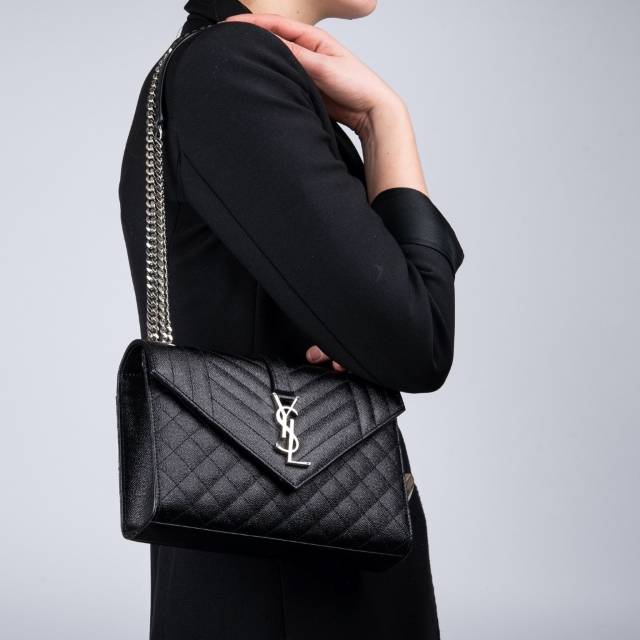

In [13]:
image_file = "fashion/image1.jpg"

image_view(image_file)

In [14]:
gpt4V_fashion(image_file)

Analysis of image: fashion/image1.jpg

1. ITEM'S TYPE: Bag
2. BRAND: Yves Saint Laurent (YSL)
3. COLOR: Black
4. PATTERN: Quilted diamond pattern
5. MATERIAL: Leather
6. FEATURES: Silver metal YSL logo, chain link shoulder strap
7. ITEM TYPE SPECIFIC: Envelope style flap closure
8. MISC.: The bag appears to be a medium size.
9. SIZE: Not visible in the image.
10. ITEM SUMMARY: A classic black quilted leather YSL envelope bag with a silver chain strap.
11. ITEM CLASSIFICATION: BAG
12. ITEM TAGS: YSL, quilted bag, black leather, luxury handbag, designer bag, chain strap, envelope closure, silver logo, fashion accessory, statement piece

13. STORIES: 
   - This YSL bag is the epitome of timeless elegance, perfect for elevating any outfit.
   - The quilted leather texture adds a touch of sophistication to this luxury accessory.
   - Carry your essentials in style with this iconic designer piece.
   - Whether you're heading to a business meeting or a night out, this bag is a versatile choic

### Another example

fashion/image2.jpg


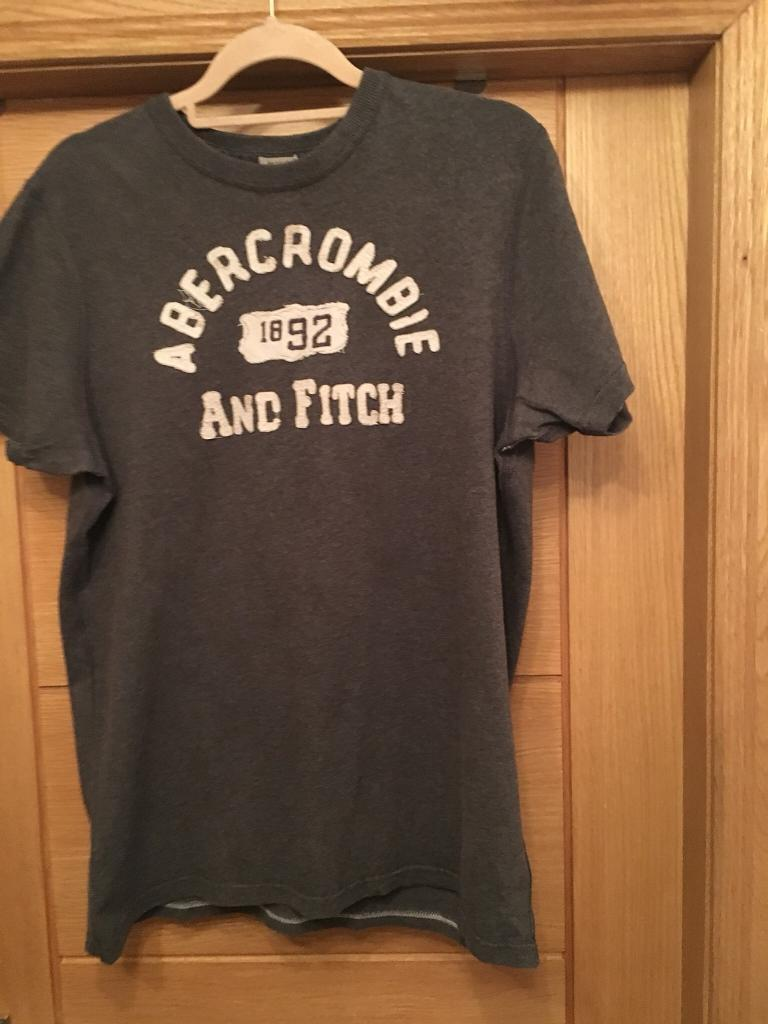

In [15]:
image_file = "fashion/image2.jpg"

image_view(image_file)

In [16]:
gpt4V_fashion(image_file)

Analysis of image: fashion/image2.jpg

1. ITEM'S TYPE: Top (T-shirt)
2. BRAND: Abercrombie & Fitch
3. COLOR: Charcoal gray with white lettering.
4. PATTERN: Solid color with a graphic print.
5. MATERIAL: Likely cotton or a cotton blend.
6. FEATURES: The shirt features a prominent logo print in white with the year '1892', distressed details on the print for a vintage look, short sleeves, and a crew neckline.
7. ITEM TYPE SPECIFIC: This is a casual, crew neck, short-sleeved t-shirt with a straight hem.
8. MISC.: The shirt appears to have a relaxed fit.
9. SIZE: Not visible in the image.
10. ITEM SUMMARY: A vintage-inspired Abercrombie & Fitch logo tee in charcoal gray.
11. ITEM CLASSIFICATION: CLOTHES

12. ITEM TAGS: casual, t-shirt, Abercrombie & Fitch, logo, vintage, crew neck, short sleeve, charcoal, cotton, streetwear

13. STORIES:
- Take a step back into the '90s with this Abercrombie & Fitch vintage logo t-shirt.
- Perfect for a casual day out, this tee pairs well with jeans or sho

### Another example

fashion/image3.png


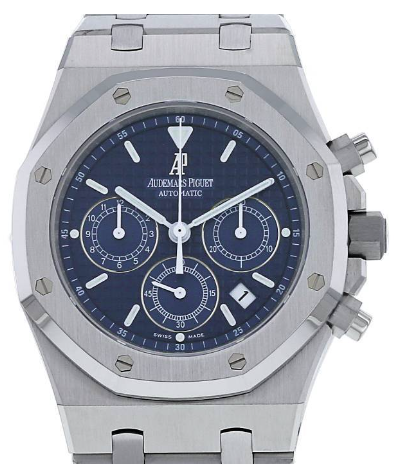

In [17]:
image_file = "fashion/image3.png"

image_view(image_file)

In [18]:
gpt4V_fashion(image_file)

Analysis of image: fashion/image3.png

1. ITEM'S TYPE: This item is a watch.

2. BRAND: The brand of the watch is Audemars Piguet.

3. COLOR: The main color of the watch is silver with a secondary color of navy blue on the dial.

4. PATTERN: There is no distinct pattern but a chronograph design on the dial.

5. MATERIAL: The material appears to be stainless steel for the band and case, with a sapphire crystal face.

6. FEATURES: The watch features a date window, three subdials for chronograph functions, and luminescent hands and markers. It has a hexagonal bezel with exposed screws, which is a signature feature of the Audemars Piguet Royal Oak collection.

7. ITEM TYPE SPECIFIC: This is a luxury men's watch with a bracelet-style band, a fold-over clasp, automatic movement, and water resistance.

8. MISC.: The watch has a powerful and sophisticated look, indicative of high-end craftsmanship.

9. SIZE: The size is not specified in the image.

10. ITEM SUMMARY: A sophisticated Audemars Pi

### Another example

fashion/image4.jpg


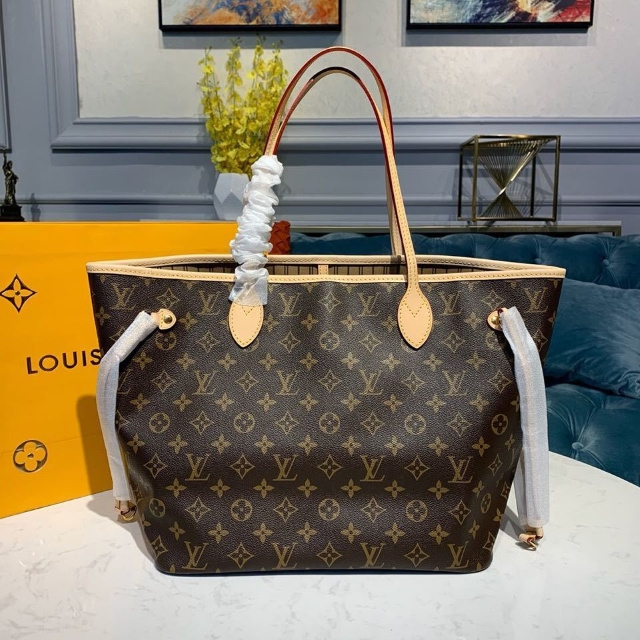

In [19]:
image_file = "fashion/image4.jpg"

image_view(image_file)

In [20]:
gpt4V_fashion(image_file)

Analysis of image: fashion/image4.jpg

1. ITEM'S TYPE: Bag (Tote Bag)
2. BRAND: Louis Vuitton
3. COLOR: Brown, Beige, Gold
4. PATTERN: Monogram
5. MATERIAL: Canvas with leather trim
6. FEATURES: Leather handles, monogram pattern, gold-tone hardware
7. ITEM TYPE SPECIFIC: Spacious interior, open top, flat base
8. MISC.: The bag has a scarf tied around one of the handles, which is not a part of the original design.
9. SIZE: Not available from the image.
10. ITEM SUMMARY: A classic Louis Vuitton monogram canvas tote bag with leather details.
11. ITEM CLASSIFICATION: BAG
12. ITEM TAGS: Louis Vuitton, luxury, tote bag, monogram, designer, canvas, leather, brown, gold hardware, fashion

13. STORIES:
- Every step she took through the bustling city streets was accompanied by the soft rustle of her cherished Louis Vuitton tote.
- As she sat in the café, her tote by her side, it wasn't just her coffee that was rich—her style spoke volumes.
- From work essentials to weekend getaways, her LV tote 

### Another example

fashion/image5.jpg


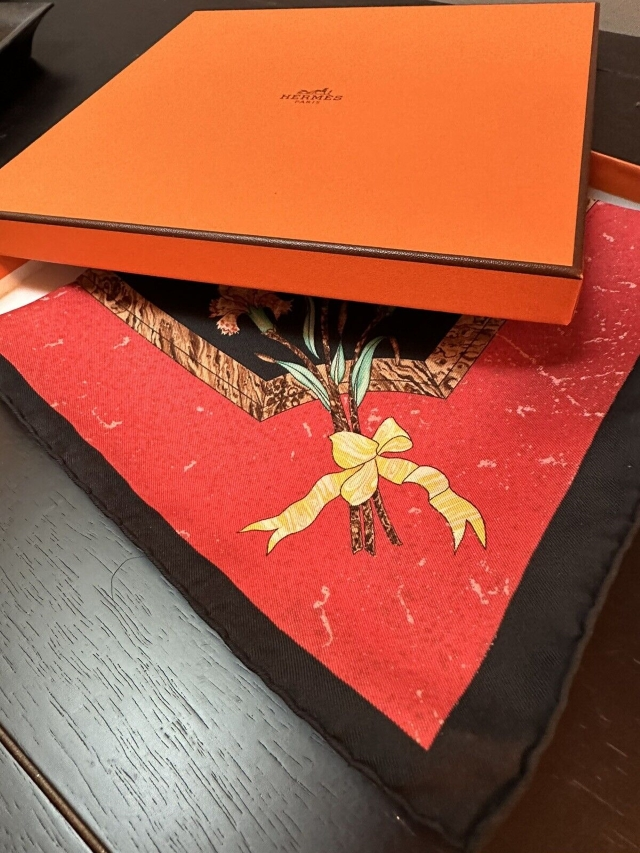

In [21]:
image_file = "fashion/image5.jpg"

image_view(image_file)

In [22]:
gpt4V_fashion(image_file)

Analysis of image: fashion/image5.jpg

1. ITEM'S TYPE: This appears to be a top, likely a scarf given the context of presentation and the fold.
2. BRAND: The item is from Hermès, as indicated by the box.
3. COLOR: The main color is red with secondary colors including yellow, green, and possible hints of black or dark brown.
4. PATTERN: The scarf features a botanical print with a large yellow flower and green leaves.
5. MATERIAL: The scarf is likely made from silk, a common material for Hermès scarves.
6. FEATURES: The scarf has a hand-rolled hem, which is a signature finish for Hermès silk scarves.
7. ITEM TYPE SPECIFIC: Due to the visible portion, detailed description of the scarf's edge finish and overall design cannot be fully determined.
8. MISC.: The scarf is presented in an iconic Hermès orange box, which often indicates it's new or a gift.
9. SIZE: The size is not visible in the image.
10. ITEM SUMMARY: An Hermès silk scarf with a vibrant red botanical print.
11. ITEM CLASSIFICA

### Another example

fashion/image6.png


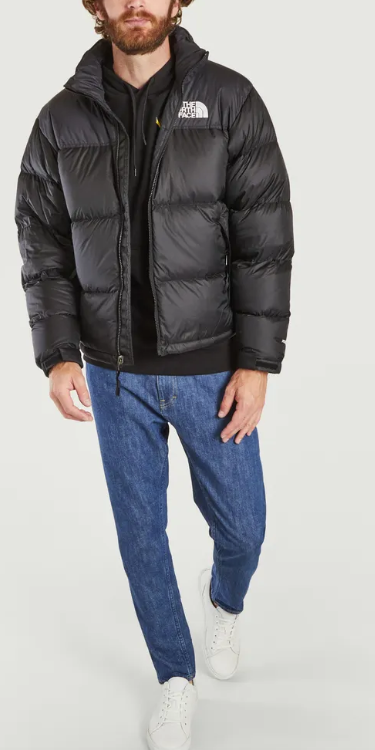

In [25]:
image_file = "fashion/image6.png"

image_view(image_file)

In [26]:
gpt4V_fashion(image_file)

Analysis of image: fashion/image6.png

1. ITEM'S TYPE: This is an outerwear piece, specifically a puffer jacket.
2. BRAND: The North Face.
3. COLOR: Main color is black.
4. PATTERN: There is no visible pattern; the jacket is a solid color.
5. MATERIAL: Likely to be a synthetic water-resistant outer shell with down or synthetic insulation.
6. FEATURES: High collar, front zipper closure, quilted sections for insulation, embroidered brand logo on the chest, side pockets.
7. ITEM TYPE SPECIFIC: The jacket has a regular fit with a hip-length cut and long sleeves. It also appears to have elastic cuffs and a hem to keep the cold out.
8. MISC.: The jacket seems to have a slight sheen to it, indicating a possibly water-resistant or water-repellent material.
9. SIZE: The size is not visible in the image.
10. ITEM SUMMARY: A classic black The North Face puffer jacket with a high collar and quilted insulation.
11. ITEM CLASSIFICATION: CLOTHES.
12. ITEM TAGS: puffer jacket, The North Face, black, o

### Another example

fashion/image7.jpg


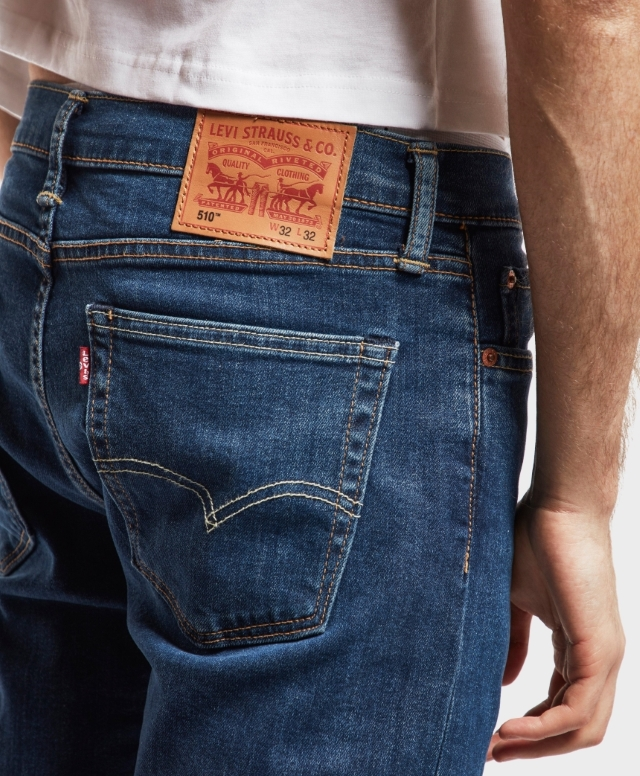

In [27]:
image_file = "fashion/image7.jpg"

image_view(image_file)

In [28]:
gpt4V_fashion(image_file)

Analysis of image: fashion/image7.jpg

1. ITEM'S TYPE: Bottom - Jeans
2. BRAND: Levi Strauss & Co.
3. COLOR: Primary color is blue with variations of light and dark washes.
4. PATTERN: No distinct pattern, classic denim texture.
5. MATERIAL: Denim (cotton blend).
6. FEATURES: The jeans feature a leather back patch with the brand logo, red Levi's tag on the back pocket, contrast stitching, and the classic five-pocket design.
7. ITEM TYPE SPECIFIC: These are Levi's 510 jeans which are known for their skinny fit from hip to ankle and a mid-rise waist.
8. MISC.: The image shows only the back half of the jeans, focusing on the brand patch and back pockets.
9. SIZE: W32 L32 (as indicated on the leather patch).
10. ITEM SUMMARY: Classic blue Levi's 510 skinny jeans with iconic leather patch and red tag detail.
11. ITEM CLASSIFICATION: CLOTHES
12. ITEM TAGS: Levi's, jeans, denim, skinny, 510, blue, casual, mid-rise, five-pocket, iconic

13. STORIES:
- Every thread tells a story of craftsmanshi

### Another example

fashion/image8.jpg


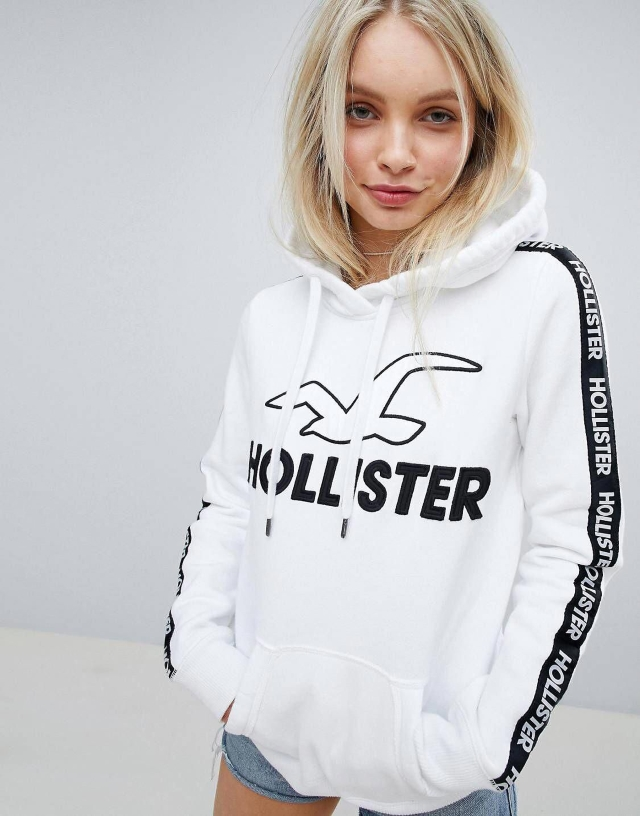

In [29]:
image_file = "fashion/image8.jpg"

image_view(image_file)

In [30]:
gpt4V_fashion(image_file)

Analysis of image: fashion/image8.jpg

1. ITEM'S TYPE: This is a top, specifically a hoodie.
2. BRAND: The brand of the hoodie is Hollister.
3. COLOR: The hoodie's main color is white.
4. PATTERN: There is no visible pattern, but there is branding text and a logo graphic.
5. MATERIAL: The material appears to be a cotton blend typical for sweatshirts.
6. FEATURES: Unique details include the branded tape along the sleeves, a large logo graphic on the chest, and the drawstrings for the hood.
7. ITEM TYPE SPECIFIC: The hoodie has a kangaroo pocket at the front, ribbed cuffs, and a drawstring hood.
8. MISC.: The hoodie seems to have a relaxed fit and is part of casual wear.
9. SIZE: The size of the item is not visible in the image.
10. ITEM SUMMARY: A white Hollister hoodie with branded sleeve tape and logo graphic.
11. ITEM CLASSIFICATION: CLOTHES.
12. ITEM TAGS: hoodie, Hollister, white, casual, cotton, logo, drawstring, kangaroo pocket, sleeve tape, branded.

13. STORIES:
- The white Hol

## 4. Gradio WebApp

In [31]:
def gpt4V_fashion_webapp(pil_image):
    """
    GPT4-Vision
    """
    # Endpoint
    base_url = f"{openai.api_base}/openai/deployments/{model}"
    gpt4vision_endpoint = f"{base_url}/chat/completions?api-version=2023-12-01-preview"

    # Header
    headers = {"Content-Type": "application/json", "api-key": openai.api_key}

    # Encoded PIL image
    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")
    base_64_encoded_image = base64.b64encode(buffered.getvalue()).decode("ascii")

    context = """ 
    You are a fashion expert, familiar with identifying features of fashion articles from images.
    A user will upload an image and asks you to describe one particular piece in the shot: jacket, shoes, pants, \
    watches, etc.
    """

    prompt = """
    You respond with your analysis of the following fields:

    1. ITEM'S TYPE: Identify if it's a top, bottom, dress, outerwear, footwear, bag, jewelry...
    2. BRAND: identity the brand of the item.
    3. COLOR: Note the main color(s) and any secondary colors.
    4. PATTERN: Identify any visible patterns such as stripes, florals, animal print, or geometric designs.\
    Feel free to use any other patterns here.
    5. MATERIAL: Best guess at the material that the item is made from.
    6. FEATURES: Note any unique details or embellishments, like embroidery, sequins, studs, fringes, buttons,
    zippers...
    7. ITEM TYPE SPECIFIC: For each type of item, feel free to add any additional descriptions that are relevant \
    to help describe the item. For example, for a jacket you can include the neck and sleeve design, plus the length.
    8. MISC.: Anything else important that you notice.
    9. SIZE: Print the size of the item if you get it from the image.
    10. ITEM SUMMARY: Write a one line summary for this item.
    11. ITEM CLASSIFICATION: Classify this item into CLOTHES, BAG, SHOES, WATCH or OTHERS.
    12. ITEM TAGS: Generate 10 tags to describe this item. Each tags should be separated with a comma.
    13. STORIES: Write multiple stories about this product in 5 lines.
    14. TWEETER PUBLICATION: Write a tweeter ad for this item with some hashtags and emojis.
    15. ECOMMERCE AD: Generate an item description for a publication on a ecommerce website with a selling message.
    16. FRENCH ECOMMERCE AD: Generate an item description in French for a publication on a ecommerce website with \
    a selling message.

    The output should be a numbered bulleted list. Just print an empty line between each items starting at item 12.
    """

    # Prompt
    json_data = {
        "messages": [
            {"role": "system", "content": context},
            {"role": "user", "content": [prompt, {"image": base_64_encoded_image}]},
        ],
        "max_tokens": 4000,
        "temperature": 0.7,
    }

    # Results
    response = requests.post(
        gpt4vision_endpoint, headers=headers, data=json.dumps(json_data)
    )

    if response.status_code == 200:
        resp = json.loads(response.text)["choices"][0]["message"]["content"]
        resp1, resp2 = resp.split("13. STORIES:", 1)
        resp1 = resp1.replace("\n\n", "")
        resp2 = "13. STORIES:" + resp2
        return resp1, resp2

    elif response.status_code == 429:
        msg1 = "[429 Error] Too many requests. Please wait a couple of seconds and try again."
        msg2 = msg1
        return msg1, msg2

    else:
        msg1 = str(response.status_code)
        msg2 = msg1
        return msg1, msg2

In [34]:
image_url = (
    "https://raw.githubusercontent.com/retkowsky/images/master/fashion-logo-design.jpg"
)
logo = "<center> <img src= {} width=200px></center>".format(image_url)
title = "GPT-4 Vision demo with Azure Open AI - Fashion usecase"

examples = [
    "fashion/image1.jpg",
    "fashion/image2.jpg",
    "fashion/image3.png",
    "fashion/image4.jpg",
    "fashion/image5.jpg",
    "fashion/image6.png",
    "fashion/image7.jpg",
    "fashion/image8.jpg",
]

inputs = gr.Image(type="pil", label="Your image")
outputs = [
    gr.Text(label="Product image insights"),
    gr.Text(label="Marketing content"),
]

theme = "rottenlittlecreature/Moon_Goblin"
# https://huggingface.co/spaces/gradio/theme-gallery

gpt4V_fashion_gradiowebapp = gr.Interface(
    fn=gpt4V_fashion_webapp,
    inputs=inputs,
    outputs=outputs,
    description=logo,
    title=title,
    examples=examples,
    theme=theme,
)

In [35]:
gpt4V_fashion_gradiowebapp.launch(share=True)

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://92d025172356783aac.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
